<a href="https://colab.research.google.com/github/YuxuanHuang455/PS-Microexpression/blob/main/Causal_Inference_Workflow-Micro_expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Causal Inference Using Regression Discontinuity Design (RDD) in Four Steps**  

**Step 1: Model the Problem**  
Identify the problem and define the treatment and running variable.  
- **Objective:** Estimate the causal effect of a treatment or intervention that is assigned based on a threshold in a continuous variable (the running variable).  
- **Example:**  
  - **Educational Impact**: Determining the effect of attending a selective university on future earnings, where the cutoff is based on standardized test scores.  
  - **Health Policy**: Estimating the effect of Medicare on health outcomes using age 65 as a cutoff for eligibility.

**Key Concepts:**  
- **Running Variable:** Continuous variable used to determine treatment (e.g., age, income, test scores).  
- **Cutoff:** The value at which treatment is assigned (e.g., SAT score ≥ 1250).  
- **Sharp vs. Fuzzy Design:**  
  - **Sharp RDD:** Treatment is deterministically assigned at the cutoff.  
  - **Fuzzy RDD:** Probability of treatment changes discontinuously at the cutoff but is not deterministic.

---

**Step 2: Identify the Estimand**  
Define the causal effect of interest—the **Local Average Treatment Effect (LATE)**.  
- **Estimand:** The average causal effect at the cutoff point.  
  - **LATE:** Average treatment effect for individuals who are on either side of the cutoff and differ only in their treatment status.  
- **Continuity Assumption:** The potential outcomes must be continuous at the cutoff in the absence of treatment. This implies that any observed discontinuity at the cutoff is due to the treatment.  
- **Mathematically:**  
  $$ LATE = \lim_{x \to c^-} E[Y | X = x] - \lim_{x \to c^+} E[Y | X = x] $$  
  where $ c $ is the cutoff.

---

**Step 3: Estimate the Effect**  
Apply statistical methods to estimate the causal effect around the cutoff.  
1. **Visual Inspection**  
   - Plot the running variable against the outcome to check for a discontinuity at the cutoff.  
   - **Example:** Plot test scores (running variable) vs. future earnings (outcome) and observe a jump at the cutoff.  
2. **Regression Modeling**  
   - **Local Polynomial Regression:** Fit separate regression models on either side of the cutoff.  
   - **Bandwidth Selection:** Determine how far from the cutoff to include observations.  
3. **Sharp RDD Estimation:**  
   - Regression models on both sides of the cutoff to estimate the treatment effect.  
4. **Fuzzy RDD Estimation:**  
   - Use **Two-Stage Least Squares (2SLS)**, where the running variable is an instrument for treatment.

**Example Python Code for Sharp RDD**  
```python
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Load and prepare data
data = pd.read_csv('rdd_example.csv')
data['running_variable_centered'] = data['running_variable'] - 50  # Recenter the cutoff at 0

# Estimate treatment effect using local linear regression
model = smf.ols('outcome ~ running_variable_centered * treatment', data=data).fit()
print(model.summary())

# Visualize
plt.scatter(data['running_variable'], data['outcome'], alpha=0.5)
plt.axvline(x=50, color='red', linestyle='--', label='Cutoff')
plt.xlabel('Running Variable')
plt.ylabel('Outcome')
plt.title('RDD Visualization')
plt.legend()
plt.show()
```

---

**Step 4: Validate the Model**  
Check the assumptions and robustness of your estimates.  
1. **Continuity of Covariates:** Ensure no other variable changes discontinuously at the cutoff.  
   - **Example:** Plot and test for jumps in covariates (e.g., age, gender, socioeconomic status) at the cutoff.  
2. **Placebo Tests:** Apply the same method to other cutoffs where no treatment effect is expected.  
3. **McCrary Test:** Check for manipulation of the running variable at the cutoff.  
   - **Example:** A sudden spike in observations just above or below the cutoff may indicate manipulation.  
4. **Robustness Checks:** Use different bandwidths and polynomial orders in your regression to ensure stability of results.

---

# **Interactive Class Activity: Regression Discontinuity Hackathon**  
**Objective:** Build a mini-project using synthetic data to explore RDD.  

1. **Step 1: Generate Synthetic Data**  
   Create data with a running variable and an artificial treatment effect at a cutoff.  

2. **Step 2: Visualize the Data**  
   Plot the running variable vs. outcome and identify the discontinuity.  

3. **Step 3: Estimate the Causal Effect**  
   Use Python or R to estimate the treatment effect with local linear regression.  

4. **Step 4: Validate with Placebo Tests and Robustness Checks**  
   Test for covariate balance and apply McCrary’s density test.


### Step 1: Generate Synthetic Data
We create a dataset of social assistance recipients in Quebec.  
- **Running variable:** Age (with cutoff at 30).  
- **Treatment:** Receiving higher benefits if age ≥ 30.  
- **Outcome:** Employment (binary).  
- **Covariates:** Gender, education, prior earnings, region (all smooth around the cutoff).  
The true effect is set to −6 p.p. reduction in employment for those ≥ 30.


Saving micro_expression_causal_dataset.csv to micro_expression_causal_dataset.csv
                            OLS Regression Results                            
Dep. Variable:                macroF1   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     347.0
Date:                Sat, 27 Sep 2025   Prob (F-statistic):          3.28e-154
Time:                        03:00:54   Log-Likelihood:                 1812.2
No. Observations:                1000   AIC:                            -3616.
Df Residuals:                     996   BIC:                            -3597.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

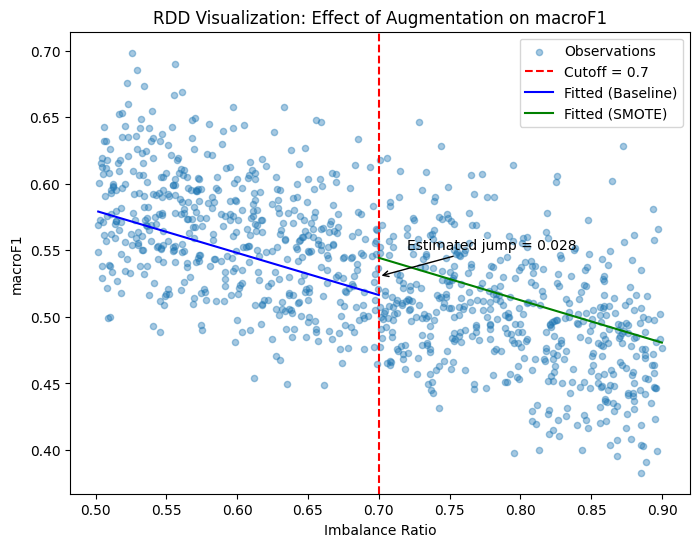

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("micro_expression_causal_dataset.csv")
cutoff = 0.7
data['running_var_centered'] = data['imbalance'] - cutoff
data['treatment'] = data['augmentation']
outcome = "macroF1"


model = smf.ols(f'{outcome} ~ running_var_centered * treatment', data=data).fit(cov_type="HC1")
print(model.summary())


plt.figure(figsize=(8,6))
plt.scatter(data['imbalance'], data[outcome], alpha=0.4, s=20, label='Observations')


plt.axvline(x=cutoff, color='red', linestyle='--', label=f'Cutoff = {cutoff}')

x_grid_left = np.linspace(data['imbalance'].min(), cutoff, 100)
x_grid_right = np.linspace(cutoff, data['imbalance'].max(), 100)

pred_left = (model.params["Intercept"]
             + model.params["running_var_centered"] * (x_grid_left - cutoff))

pred_right = (model.params["Intercept"]
              + model.params["treatment"]
              + (model.params["running_var_centered"] + model.params["running_var_centered:treatment"]) * (x_grid_right - cutoff))

plt.plot(x_grid_left, pred_left, color="blue", label="Fitted (Baseline)")
plt.plot(x_grid_right, pred_right, color="green", label="Fitted (SMOTE)")

tau_hat = model.params["treatment"]
y_cut_left = model.params["Intercept"]
y_cut_right = model.params["Intercept"] + tau_hat

plt.annotate(f"Estimated jump = {tau_hat:.3f}",
             xy=(cutoff, (y_cut_left + y_cut_right)/2),
             xytext=(cutoff+0.02, (y_cut_left + y_cut_right)/2 + 0.02),
             arrowprops=dict(arrowstyle="->", color="black"))

plt.xlabel("Imbalance Ratio")
plt.ylabel(f"{outcome}")
plt.title(f"RDD Visualization: Effect of Augmentation on {outcome}")
plt.legend()
plt.show()


### Step 2: Visualize the Data
We plot average employment rates against age, binned near the cutoff.  
A sharp **downward jump at 30** should be visible, showing the treatment effect.


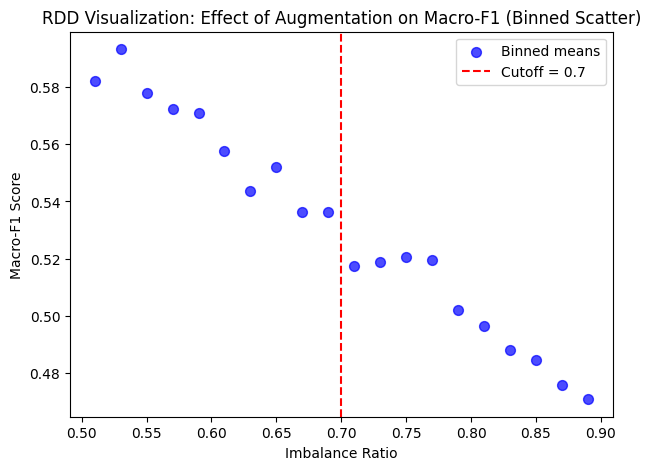

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Step 2: Binned Scatter Function
# -------------------------------
def binned_scatter(x, y, cutoff, binsize=0.02, window=0.2):
    """
    x: running variable (imbalance)
    y: outcome variable (macroF1 or accuracy)
    cutoff: threshold for treatment assignment
    binsize: bin width (default=0.02)
    window: range around cutoff (default=0.2)
    """
    mask = (x >= cutoff - window) & (x <= cutoff + window)
    xw, yw = x[mask], y[mask]

    bins = np.arange(cutoff - window, cutoff + window + binsize, binsize)
    centers = (bins[:-1] + bins[1:]) / 2

    means = [
        np.mean(yw[(xw >= b0) & (xw < b1)]) if np.sum((xw >= b0) & (xw < b1)) > 0 else np.nan
        for b0, b1 in zip(bins[:-1], bins[1:])
    ]

    return centers, means

# -------------------------------
# Apply to Micro-expression Dataset
# -------------------------------
cutoff = 0.7
centers, means = binned_scatter(
    data["imbalance"].values,
    data["macroF1"].values,
    cutoff
)

# -------------------------------
# Visualization
# -------------------------------
plt.figure(figsize=(7,5))
plt.scatter(centers, means, s=50, color="blue", alpha=0.7, label="Binned means")
plt.axvline(cutoff, color="red", linestyle="--", label=f"Cutoff = {cutoff}")
plt.xlabel("Imbalance Ratio")
plt.ylabel("Macro-F1 Score")
plt.title("RDD Visualization: Effect of Augmentation on Macro-F1 (Binned Scatter)")
plt.legend()
plt.show()


### Step 3 Estimating the Treatment Effect with Local Linear Regression

We estimate the causal effect of higher social assistance benefits at the **age 30 cutoff** using a **local linear regression**.

---

#### Model specification

$$
Y_i = \alpha + \tau \cdot \text{Treatment}_i
      + \beta \cdot (Age_i - 30)
      + \gamma \cdot \big[(Age_i - 30) \times \text{Treatment}_i\big]
      + \varepsilon_i
$$

where:

- $ Y_i $: Employment status (binary outcome). **Notes**: Precisely, we shall use logistic regression other than linear regression when the target y variable is binary.
- $ \text{Treatment}_i = 1\{Age_i \geq 30\} $: indicator for eligibility at the cutoff  
- $ (Age_i - 30) $: running variable, centered at the cutoff  
- $ \tau $: **treatment effect of interest** (discontinuity at age 30)  

---

#### Interpretation of coefficients

- **Intercept ($\alpha$)**: average outcome just below the cutoff  
- **Treatment ($ \tau$)**: estimated **jump at the cutoff** (policy’s causal effect)  
- **Running variable slope ($\beta$)**: effect of age on employment below the cutoff  
- **Interaction term ($\gamma$)**: difference in slope above vs. below the cutoff  

---

#### Estimation details

- Implemented via `statsmodels` **OLS formula API**:  
  ```python
  model = smf.ols("employment ~ running_variable_centered * treatment", data=df).fit(cov_type="HC1")
  print(model.summary())


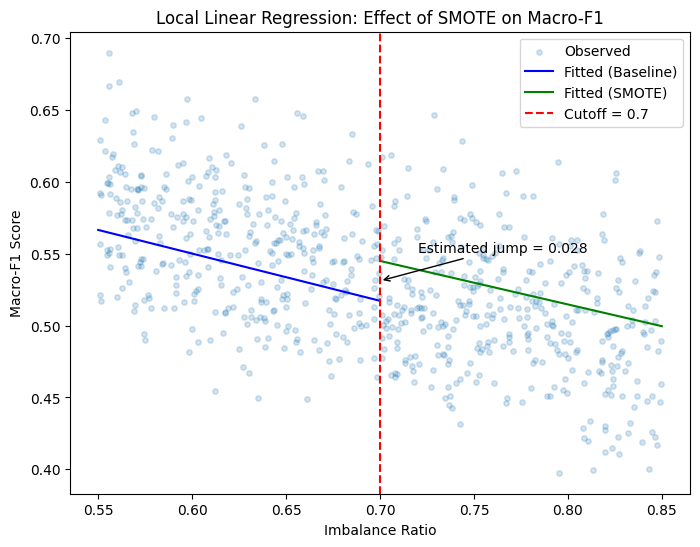

                            OLS Regression Results                            
Dep. Variable:                macroF1   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     151.8
Date:                Sat, 27 Sep 2025   Prob (F-statistic):           2.25e-76
Time:                        03:06:26   Log-Likelihood:                 1327.1
No. Observations:                 730   AIC:                            -2646.
Df Residuals:                     726   BIC:                            -2628.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Step 3: Local Linear Regression
cutoff = 0.7
bandwidth = 0.15

# centered running variable & treatment
data["running_var_centered"] = data["imbalance"] - cutoff
data["treatment"] = data["augmentation"]
df_local = data[np.abs(data["running_var_centered"]) <= bandwidth]
model = smf.ols("macroF1 ~ running_var_centered * treatment", data=df_local).fit(cov_type="HC1")

# Predictions for Visualization
x_grid_left = np.linspace(cutoff - bandwidth, cutoff, 100)
x_grid_right = np.linspace(cutoff, cutoff + bandwidth, 100)

pred_left = (model.params["Intercept"]
             + model.params["running_var_centered"] * (x_grid_left - cutoff))

pred_right = (model.params["Intercept"]
              + model.params["treatment"]
              + (model.params["running_var_centered"] + model.params["running_var_centered:treatment"]) * (x_grid_right - cutoff))

# Plot
plt.figure(figsize=(8,6))

# Scatter of observed data
plt.scatter(df_local["imbalance"], df_local["macroF1"], alpha=0.2, s=15, label="Observed")

# Fitted lines
plt.plot(x_grid_left, pred_left, color="blue", label="Fitted (Baseline)")
plt.plot(x_grid_right, pred_right, color="green", label="Fitted (SMOTE)")

# Cutoff line
plt.axvline(cutoff, color="red", linestyle="--", label=f"Cutoff = {cutoff}")

# Annotate treatment effect
tau_hat = model.params["treatment"]
y_cut_left = model.params["Intercept"]
y_cut_right = model.params["Intercept"] + tau_hat
plt.annotate(f"Estimated jump = {tau_hat:.3f}",
             xy=(cutoff, (y_cut_left + y_cut_right) / 2),
             xytext=(cutoff + 0.02, (y_cut_left + y_cut_right) / 2 + 0.02),
             arrowprops=dict(arrowstyle="->", color="black"))

plt.xlabel("Imbalance Ratio")
plt.ylabel("Macro-F1 Score")
plt.title("Local Linear Regression: Effect of SMOTE on Macro-F1")
plt.legend()
plt.show()
print(model.summary())


### Step 4 Placebo Test in RDD

To check the validity of the design, we run the same regression at a **fake cutoff** (here, age 27).  
Since no policy changed at 27, the estimated treatment effect should be close to zero.

- **Why important?**  
  - Ensures that the observed discontinuity at age 30 is not simply driven by the functional form of the regression or spurious patterns in the data.  
  - A large and significant jump at a placebo cutoff would raise concerns about model misspecification.

- **Interpretation:**  
  - If the placebo effect ≈ 0 (statistically insignificant), this supports the credibility of the RDD.  
  - If the placebo effect is large and significant, it suggests that the discontinuity at 30 might not be causal.


                            OLS Regression Results                            
Dep. Variable:                macroF1   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     68.04
Date:                Sat, 27 Sep 2025   Prob (F-statistic):           3.62e-38
Time:                        03:10:11   Log-Likelihood:                 1126.5
No. Observations:                 640   AIC:                            -2245.
Df Residuals:                     636   BIC:                            -2227.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

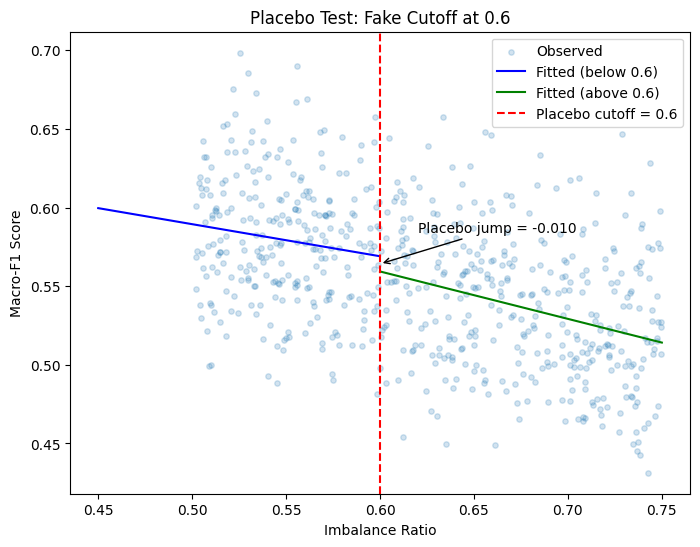

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
# Step 4: Placebo Test in RDD

placebo_cutoff = 0.6
bandwidth = 0.15
# Center running variable at placebo cutoff
data["running_var_centered_placebo"] = data["imbalance"] - placebo_cutoff
data["treatment_placebo"] = (data["imbalance"] >= placebo_cutoff).astype(int)
# Subset within bandwidth
df_local_placebo = data[np.abs(data["running_var_centered_placebo"]) <= bandwidth]

# Local linear regression
placebo_model = smf.ols("macroF1 ~ running_var_centered_placebo * treatment_placebo",
                        data=df_local_placebo).fit(cov_type="HC1")

print(placebo_model.summary())
x_grid_left = np.linspace(placebo_cutoff - bandwidth, placebo_cutoff, 100)
x_grid_right = np.linspace(placebo_cutoff, placebo_cutoff + bandwidth, 100)

pred_left = (placebo_model.params["Intercept"]
             + placebo_model.params["running_var_centered_placebo"] * (x_grid_left - placebo_cutoff))

pred_right = (placebo_model.params["Intercept"]
              + placebo_model.params["treatment_placebo"]
              + (placebo_model.params["running_var_centered_placebo"]
                 + placebo_model.params["running_var_centered_placebo:treatment_placebo"])
                 * (x_grid_right - placebo_cutoff))

plt.figure(figsize=(8,6))
plt.scatter(df_local_placebo["imbalance"], df_local_placebo["macroF1"],
            alpha=0.2, s=15, label="Observed")

plt.plot(x_grid_left, pred_left, color="blue", label=f"Fitted (below {placebo_cutoff})")
plt.plot(x_grid_right, pred_right, color="green", label=f"Fitted (above {placebo_cutoff})")

plt.axvline(placebo_cutoff, color="red", linestyle="--", label=f"Placebo cutoff = {placebo_cutoff}")

# Annotate placebo effect
tau_placebo = placebo_model.params["treatment_placebo"]
y_cut_left = placebo_model.params["Intercept"]
y_cut_right = placebo_model.params["Intercept"] + tau_placebo

plt.annotate(f"Placebo jump = {tau_placebo:.3f}",
             xy=(placebo_cutoff, (y_cut_left + y_cut_right)/2),
             xytext=(placebo_cutoff+0.02, (y_cut_left + y_cut_right)/2 + 0.02),
             arrowprops=dict(arrowstyle="->", color="black"))

plt.xlabel("Imbalance Ratio")
plt.ylabel("Macro-F1 Score")
plt.title(f"Placebo Test: Fake Cutoff at {placebo_cutoff}")
plt.legend()
plt.show()

✅ **After running this, you’ll see:**

- A **regression summary** with the placebo treatment coefficient (`treatment_placebo`).  
- A **plot** like before, but centered at **age 27** (fake cutoff).  
- If the placebo coefficient is **near 0 and statistically insignificant**, it reassures us that the observed discontinuity at **age 30** is truly causal rather than an artifact of the model.
